In [106]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [28]:
pd.options.display.max_columns = None

## Preparing Data

In [29]:
df_hospitals_raw = pd.read_csv('../data/cleaned/akutversorgungskrankenhaeuser.csv')
df_hospitals = df_hospitals_raw.copy()
df_hospitals.head()

,Name,PLZ,Bundesland,Bettanzahl,Intensivbette
0,Eisenstadt BBR KH,7000,Burgenland,352,30
1,Güssing LKH,7540,Burgenland,109,10
2,Kittsee LKH,2421,Burgenland,95,10
3,Oberpullendorf LKH,7350,Burgenland,122,12
4,Oberwart LKH,7400,Burgenland,300,22


In [30]:
df_all_hospitals = pd.read_excel('../data/raw/KA-Verzeichnis 2022-10-07.xlsx', sheet_name='KA gesamt')

df_all_hospitals.head(3)

,KA-Nr,Bundesland,Bezirk,Versorgungszone,Versorgungsregion,Versorgungssektor,Versorgungsbereich,Bezeichnung,Öffentlichkeitsrecht,Gemeinnützigkeit,Fondszugehörigkeit,Typ gem. KAKuG,Adresse,Telefon,Fax,Homepage,Ärztlicher Leiter,Pflegedienstleiter,Verwaltungsdirektor,Bettenanzahl,Anzahl geöffneter Standorte (siehe auch Registerblatt 'Standorte Akutversorgung'),Intensivbereiche,Großgeräte,Träger-Nr.,Träger Bezeichnung,Träger Adresse,Träger Telefon,Träger Fax,Träger Homepage
0,K101,Burgenland,Oberwart,Süd,Burgenland-Süd,Rehabilitation,Herz-Kreislauf-Erkrankungen,Rehabilitationszentrum für Herz-Kreislauferkra...,ohne Öffentlichkeitsrecht,nicht gemeinnützig,Sonstige,Sonder-KA,"Dr. Ludwig Thomas-Straße 1, 7431 Bad Tatzmanns...",03353 6000 0,03353 6000 43510,http://www.ska-badtatzmannsdorf.at,Univ.-Prof.in Dr.in Jeanette Strametz-Juranek,PDL Ingeborg Hutter MSc,Ing. Gerald Ringhofer MAS,175.0,1,NaN,ECT,T090,Pensionsversicherungsanstalt Wien,"Friedrich-Hillegeist-Straße 1, 1021 Wien Postfach",01/050303,01/050303-288 50,http://www.pensionsversicherung.at
1,K102,Burgenland,Eisenstadt(Stadt),Ost,Burgenland-Nord,Akutversorgung,Allgemeinversorgung,Krankenhaus der Barmherzigen Brüder Eisenstadt...,mit Öffentlichkeitsrecht,gemeinnützig,Landesfonds,Schwerpunkt-KA,"Johannes von Gott-Platz 1, 7000 Eisenstadt",02682 601 0,02682 601 1099,http://www.barmherzige-brueder.at,Prim.Dr. Martin Wehrschütz MBA,PDir. Brigitte Polstermüller MSc,Mag. Silke Göltl MA,352.0,1,"AN, IM, KIJU","COR, CT, ECT, MR",T180,Krankenhaus der Barmherzigen Brüder Eisenstadt...,"Johannes von Gott-Platz 1, 7000 Eisenstadt",02682/601-0,02682/601-1099,http://www.barmherzige-brueder.at
2,K104,Burgenland,Güssing,Süd,Burgenland-Süd,Akutversorgung,Allgemeinversorgung,Landeskrankenhaus Güssing,mit Öffentlichkeitsrecht,gemeinnützig,Landesfonds,Standard-KA,"Grazer Straße 15, 7540 Güssing",05 7979 31000,05 7979 5319,http://www.krages.at,Prim. Dr. Wilfried Horvath,DGKS Bianca Puntigam MSc,Reinhold Hallemann,109.0,1,"AN, IM","CT, MR",T101,Burgenländische Krankenanstaltengesellschaft mbH,"Hyrtlplatz 4, 7000 Eisenstadt",05 7979-30000,05 7979-3506,http://www.krages.at


In [31]:
df_population_raw = pd.read_csv('../data/cleaned/bevoelkerungsstand.csv')
df_population = df_population_raw.copy()
df_population

,Bundesland,Bevoelkerungsstand
0,Oesterreich,9061848
1,Burgenland,300457
2,Kärnten,567644
3,Niederoesterreich,1713465
4,Oberoesterreich,1517477
5,Salzburg,566751
6,Steiermark,1260417
7,Tirol,768443
8,Vorarlberg,404415
9,Wien,1962779


In [32]:
df_hospital_history = pd.read_csv('../data/raw/Number of hospitals and beds since 1985.csv', sep=';')

df_hospital_history

,Year,Measure,Hospitals total,General hospitals,Specialist hospitals,Sanatoriums,Nursing homes for chronically ill
0,1985,Number of hospitals,300,115,127,46,12
1,1985,Numder of beds,75168,47281,21903,2944,3040
2,1990,Number of hospitals,297,114,116,55,12
3,1990,Numder of beds,71324,45268,19268,3945,2843
4,1995,Number of hospitals,290,112,109,57,12
5,1995,Numder of beds,67853,44194,16973,4272,2414
6,2000,Number of hospitals,269,109,98,49,13
7,2000,Numder of beds,63674,42479,14935,3909,2351
8,2005,Number of hospitals,264,106,99,48,11
9,2005,Numder of beds,63248,41531,15413,4292,2012


In [33]:
df_hospital_history = df_hospital_history.drop(columns=['General hospitals', 'Specialist hospitals', 'Sanatoriums', 'Nursing homes for chronically ill'])



In [34]:
years = list(range(1985, 2021, 5))

df_hospital_history = df_hospital_history.query('Year.isin(@years)')

df_hospital_history.loc[df_hospital_history.Measure == 'Numder of beds', 'Measure'] = 'Number of beds'

df_hospital_history

,Year,Measure,Hospitals total
0,1985,Number of hospitals,300
1,1985,Number of beds,75168
2,1990,Number of hospitals,297
3,1990,Number of beds,71324
4,1995,Number of hospitals,290
5,1995,Number of beds,67853
6,2000,Number of hospitals,269
7,2000,Number of beds,63674
8,2005,Number of hospitals,264
9,2005,Number of beds,63248


In [53]:
population_sum_austria = (
    df_population
    .query('Bundesland == "Oesterreich"')
    .Bevoelkerungsstand
)

population_sum_austria

0    9061848
Name: Bevoelkerungsstand, dtype: int64

In [36]:
population_austria = (
    df_population
    .set_index('Bundesland')
)

In [37]:
acute_bed_count = (
    df_hospitals
    .groupby('Bundesland')
    .Bettanzahl
    .sum()
    .sort_values(ascending=False)
)

acute_bed_count

Bundesland
Wien                 9746
Oberoesterreich      7813
Niederoesterreich    7286
Steiermark           6668
Tirol                4305
Salzburg             3192
Kärnten              3187
Vorarlberg           1893
Burgenland            978
Name: Bettanzahl, dtype: int64

In [38]:
df_all_hospitals.loc[df_all_hospitals.Bundesland == 'Niederösterreich', 'Bundesland'] = 'Niederoesterreich'
df_all_hospitals.loc[df_all_hospitals.Bundesland == 'Oberösterreich', 'Bundesland'] = 'Oberoesterreich'

bed_count = (
    df_all_hospitals
    .groupby('Bundesland')
    .Bettenanzahl
    .sum()
    .astype(int)
    .replace()
)

bed_count

Bundesland
Burgenland            1631
Kärnten               4361
Niederoesterreich    11076
Oberoesterreich       9837
Salzburg              4480
Steiermark            9757
Tirol                 4994
Vorarlberg            2138
Wien                 13653
Name: Bettenanzahl, dtype: int64

In [39]:
intensive_bed_count = (
    df_hospitals
    .groupby('Bundesland')
    .Intensivbette
    .sum()
    .sort_values(ascending=False)
)

intensive_bed_count

Bundesland
Wien                 735
Steiermark           397
Niederoesterreich    393
Oberoesterreich      379
Tirol                212
Kärnten              185
Salzburg             183
Burgenland            84
Vorarlberg            80
Name: Intensivbette, dtype: int64

In [40]:
hospital_count = (
    df_hospitals
    .groupby('Bundesland')
    .size()
    .sort_values(ascending=False)
)

hospital_count

Bundesland
Steiermark           39
Wien                 32
Niederoesterreich    27
Oberoesterreich      22
Salzburg             21
Kärnten              15
Tirol                15
Vorarlberg            9
Burgenland            5
dtype: int64

## Total available hospital beds in austria per 1000

In [54]:
print(f'available hospital beds in austria per 1.000 = {round(float((bed_count.sum() / population_sum_austria) * 1000), ndigits=2)}')

available hospital beds in austria per 1.000 = 6.83


In [55]:
for bundesland in df_population.Bundesland[1:]:
    available_beds = (bed_count.loc[bundesland] / population_austria.loc[bundesland]) * 1000
    print(f'available hospital beds in {bundesland} = {round(float(available_beds), ndigits=2)}')

available hospital beds in Burgenland = 5.43
available hospital beds in Kärnten = 7.68
available hospital beds in Niederoesterreich = 6.46
available hospital beds in Oberoesterreich = 6.48
available hospital beds in Salzburg = 7.9
available hospital beds in Steiermark = 7.74
available hospital beds in Tirol = 6.5
available hospital beds in Vorarlberg = 5.29
available hospital beds in Wien = 6.96


## Available acute care beds in austria per 1000

In [56]:
print(f'available acute beds in austria per 1.000 = {round(float((acute_bed_count.sum() / population_sum_austria) * 1000), ndigits=2)}')

available acute beds in austria per 1.000 = 4.97


In [57]:
for bundesland in df_population.Bundesland[1:]:
    available_beds = (acute_bed_count.loc[bundesland] / population_austria.loc[bundesland]) * 100000
    print(f'available hospital beds in {bundesland} = {round(float(available_beds), ndigits=2)}')

available hospital beds in Burgenland = 325.5
available hospital beds in Kärnten = 561.44
available hospital beds in Niederoesterreich = 425.22
available hospital beds in Oberoesterreich = 514.87
available hospital beds in Salzburg = 563.21
available hospital beds in Steiermark = 529.03
available hospital beds in Tirol = 560.22
available hospital beds in Vorarlberg = 468.08
available hospital beds in Wien = 496.54


In [58]:
print(f'available acute beds in austria per 100.000 = {round((float((acute_bed_count.sum() / population_sum_austria) * 100000)/100), ndigits=2)}')

available acute beds in austria per 100.000 = 4.97


## Available intensive care beds per 100.000

In [59]:
print(f'available intensive care beds in austria per 100.000 = {round(float((intensive_bed_count.sum() / population_sum_austria) * 100000),ndigits=2)}')

available intensive care beds in austria per 100.000 = 29.22


In [60]:
for bundesland in df_population.Bundesland[1:]:
    available_beds = (intensive_bed_count.loc[bundesland] / population_austria.loc[bundesland]) * 100000
    print(f'available intensive care beds in {bundesland} = {round(float(available_beds), ndigits=2)}')

available intensive care beds in Burgenland = 27.96
available intensive care beds in Kärnten = 32.59
available intensive care beds in Niederoesterreich = 22.94
available intensive care beds in Oberoesterreich = 24.98
available intensive care beds in Salzburg = 32.29
available intensive care beds in Steiermark = 31.5
available intensive care beds in Tirol = 27.59
available intensive care beds in Vorarlberg = 19.78
available intensive care beds in Wien = 37.45


## The number of available beds/ hospitals decreased

In [61]:
df_hospital_history

,Year,Measure,Hospitals total
0,1985,Number of hospitals,300
1,1985,Number of beds,75168
2,1990,Number of hospitals,297
3,1990,Number of beds,71324
4,1995,Number of hospitals,290
5,1995,Number of beds,67853
6,2000,Number of hospitals,269
7,2000,Number of beds,63674
8,2005,Number of hospitals,264
9,2005,Number of beds,63248


In [62]:
compare_bednums = df_hospital_history.query('Measure == "Number of beds"')
compare_hospitalnums = df_hospital_history.query('Measure == "Number of hospitals"')

In [63]:
compare_bednums

,Year,Measure,Hospitals total
1,1985,Number of beds,75168
3,1990,Number of beds,71324
5,1995,Number of beds,67853
7,2000,Number of beds,63674
9,2005,Number of beds,63248
11,2010,Number of beds,64008
13,2015,Number of beds,65138
21,2020,Number of beds,62873


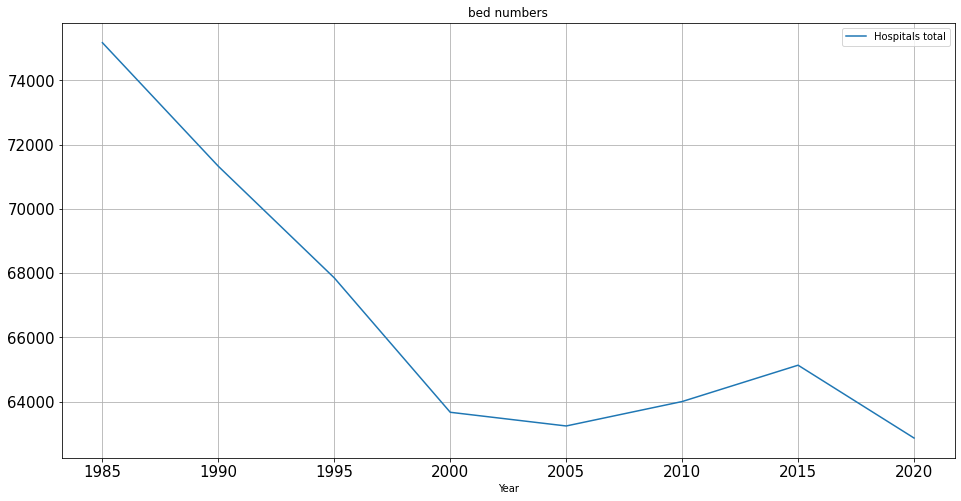

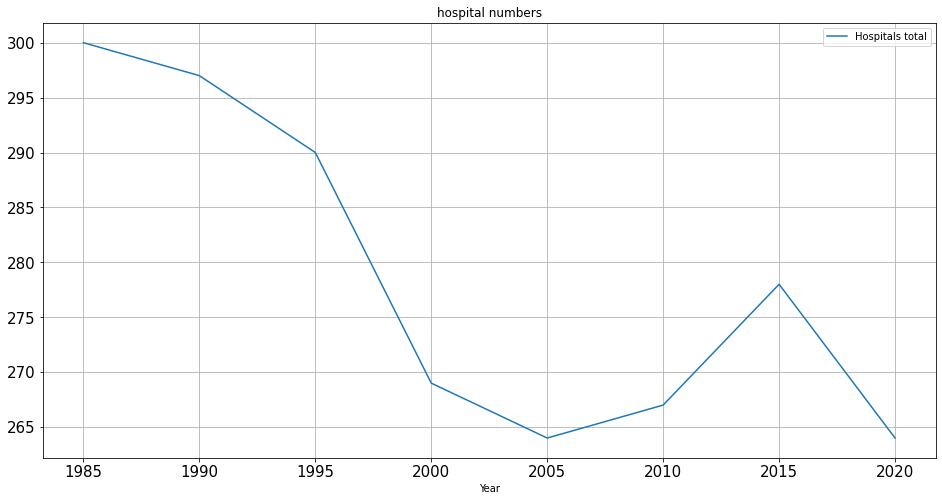

In [374]:
compare_bednums.plot.line(x='Year', y='Hospitals total', title='bed numbers', figsize=[16,8], grid=True, fontsize=15, xlabel='Year');

compare_hospitalnums.plot.line(x='Year', y='Hospitals total', title='hospital numbers', figsize=[16,8], grid=True, fontsize=15);

In [358]:
compare_hospitalnums

,Year,Measure,Hospitals total
0,1985,Number of hospitals,300
2,1990,Number of hospitals,297
4,1995,Number of hospitals,290
6,2000,Number of hospitals,269
8,2005,Number of hospitals,264
10,2010,Number of hospitals,267
12,2015,Number of hospitals,278
20,2020,Number of hospitals,264


### But wait damn minute, the number of acute hospital beds are decreasing around europe too??

In [104]:
df_hospitals_europe = pd.read_csv('../data/cleaned/hospital_beds_europe.csv')

df_hospitals_europe = df_hospitals_europe.set_index('COUNTRY_REGION')

df_hospitals_europe = df_hospitals_europe.transpose()

df_hospitals_europe

COUNTRY_REGION,Austria,Czech Republic,France,Germany,Switzerland
2000,6.8487,5.7727,5.2573,6.8094,5.3072
2001,6.7524,5.7211,5.1333,6.7122,5.1162
2002,6.6667,5.6891,5.0477,6.6352,5.0361
2003,6.5589,5.5793,4.9206,6.5669,4.9260
2004,6.4919,5.4285,4.8292,6.4403,4.8339
2005,6.4277,5.3534,4.7667,6.3521,4.7060
2006,6.3715,5.2631,4.6737,6.2012,4.5396
2007,6.3798,5.1975,4.6205,6.1626,4.4830
2008,6.2926,5.0796,4.5428,6.1296,4.3479
2009,6.2299,4.9840,4.5113,6.1477,4.2664


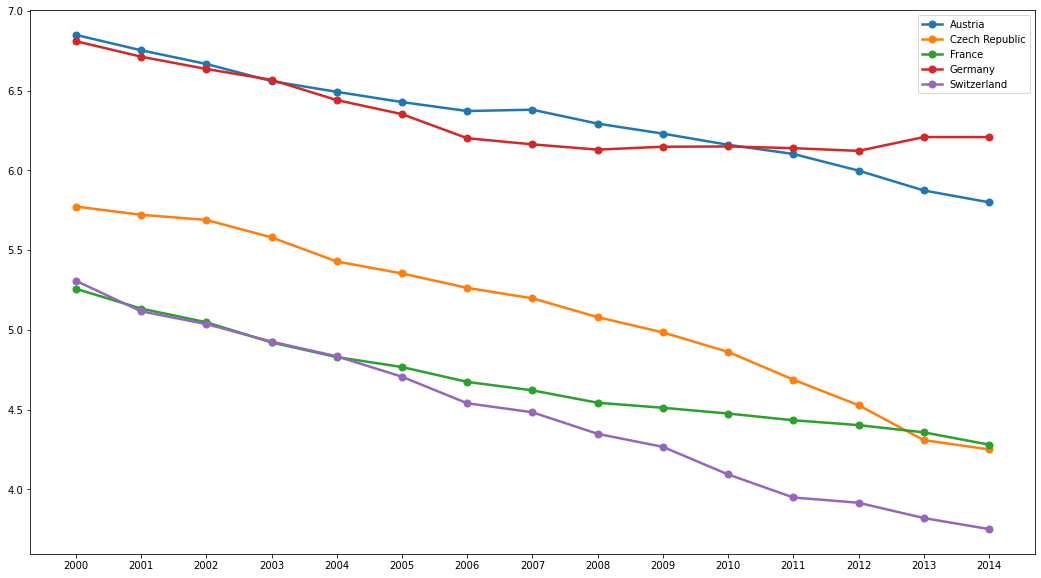

In [105]:
plt.figure(figsize=(18,10));

for country in df_hospitals_europe.columns:
    plt.plot(df_hospitals_europe.index,
             df_hospitals_europe[country],
             label=country,
             linewidth=2.5, 
             marker='o', 
             markersize=7)



plt.legend()
plt.show();

But why? <br>
https://apps.who.int/iris/bitstream/handle/10665/330300/HiT-15-7-2013-eng.pdf?sequence=5 <br>
https://www.euro.who.int/__data/assets/pdf_file/0011/108848/E85032.pdf